<Axes: >

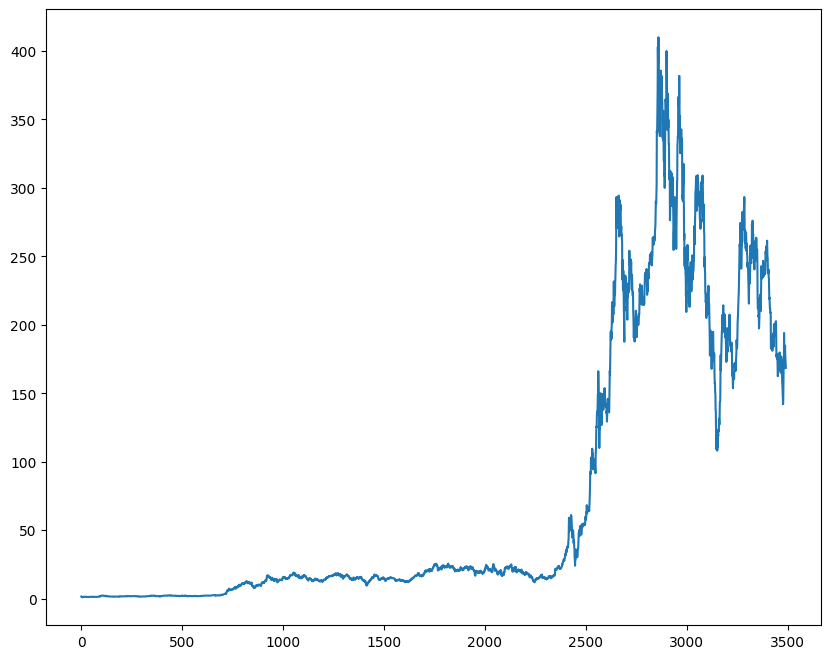

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

df = pd.read_csv('TSLA.csv')
df.head()
# Load the dataset
series_shifted = df['Close'].shift()
df['Prev_Close'] = series_shifted
df.head()
df.shape
df.isnull().sum()
df = df.dropna()
df['Close'].plot(figsize=(10,8))

In [ ]:


# Extract features and target variable
X = df[['Open','Prev_Close']]
y = df['Close']



In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
# Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Initialize SVR
regressor = SVR(kernel='rbf')  # Radial Basis Function kernel

# Fit the model
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:


# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_test, y_pred)
print("r2_score", r2)



Mean Squared Error: 169.95094484035278
Root Mean Squared Error: 13.03652349517895
r2_score 0.9828486579356592


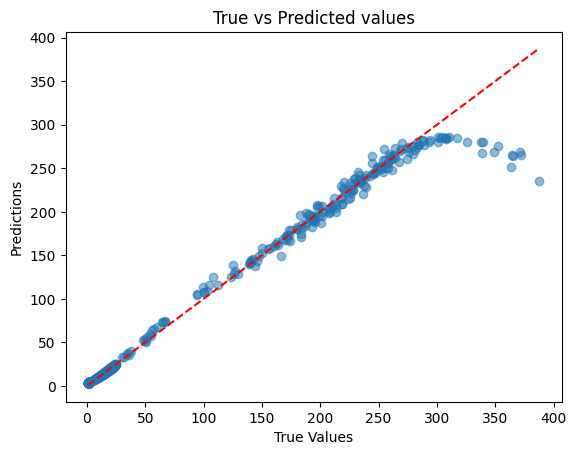

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(np.arange(min(y_test), max(y_test), 1), np.arange(min(y_test), max(y_test), 1), color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted values")
plt.show()